In [ ]:
%matplotlib inline


# Extracting signals from a brain parcellation

Here we show how to extract signals from a brain parcellation and compute
a correlation matrix.

We also show the importance of defining good confounds signals: the
first correlation matrix is computed after regressing out simple
confounds signals: movement regressors, white matter and CSF signals, ...
The second one is without any confounds: all regions are connected to
each other.


One reference that discusses the importance of confounds is `Varoquaux and
Craddock, Learning and comparing functional connectomes across subjects,
NeuroImage 2013
<http://www.sciencedirect.com/science/article/pii/S1053811913003340>`_.

This is just a code example, see the `corresponding section in the
documentation <parcellation_time_series>` for more.

<div class="alert alert-info"><h4>Note</h4><p>This example needs SciPy >= 1.0.0 for the reordering of the matrix.</p></div>


## Retrieve the atlas and the data



In [ ]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

# One subject of brain development fmri data
data = datasets.fetch_development_fmri(n_subjects=1)
fmri_filenames = data.func[0]

C:\Users\sz144\AppData\Roaming\Python\Python38\site-packages\nilearn\datasets\__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "



Dataset created in C:\Users\sz144/nilearn_data\fsl



Downloaded 23855104 of 25716861 bytes (92.8%,    0.3s remaining) ...done. (5 seconds, 0 min)
Extracting data from C:\Users\sz144/nilearn_data\fsl\f8e0b2b85f1ec621c8ef3738888b4b6a\HarvardOxford.tgz...

Atlas ROIs are located in nifti image (4D) at: C:\Users\sz144/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


.. done.


## Extract signals on a parcellation defined by labels
Using the NiftiLabelsMasker



In [ ]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(fmri_filenames, confounds=data.confounds)

[NiftiLabelsMasker.fit_transform] loading data from C:\Users\sz144\nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('C:\\Users\\sz144/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels_img': 'C:\\Users\\sz144/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=[ 'C:\\Users\\sz144/nilearn_data\\developmen

## Compute and display a correlation matrix



C:\Users\sz144\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\matrix_plotting.py:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  ylabel_width = ax.yaxis.get_tightbbox(renderer).inverse_transformed(
C:\Users\sz144\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\matrix_plotting.py:30: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  xlabel_height = ax.xaxis.get_tightbbox(renderer).inverse_transformed(


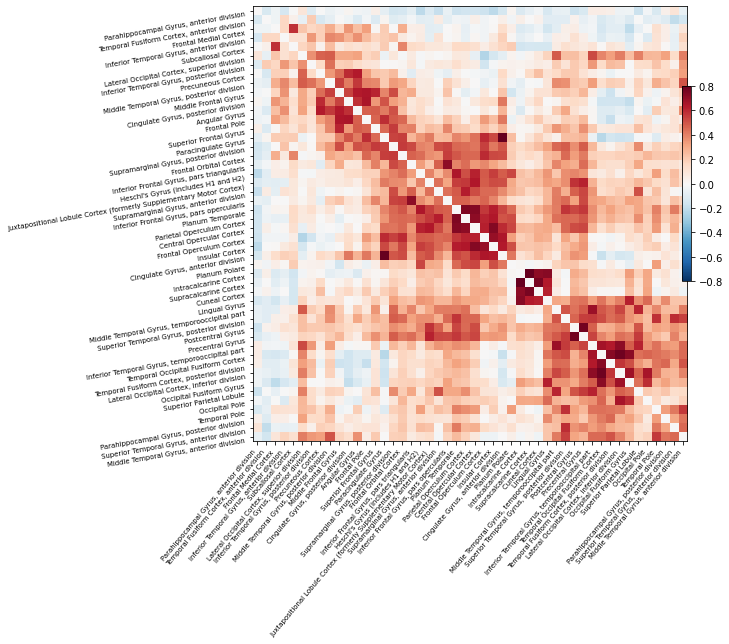

In [ ]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

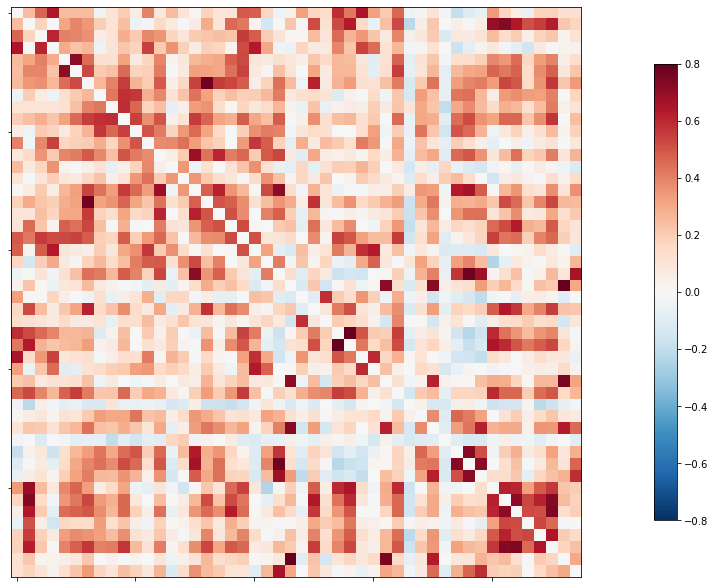

In [ ]:
import matplotlib.pylab as plt

plotting.plot_matrix(correlation_matrix, figure=(10, 8), vmax=0.8, vmin=-0.8)
plt.savefig("brain_network.pdf", bbox_inches='tight')

## Same thing without confounds, to stress the importance of confounds



In [ ]:
time_series = masker.fit_transform(fmri_filenames)
# Note how we did not specify confounds above. This is bad!

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='No confounds', reorder=True)

plotting.show()